<a href="https://colab.research.google.com/github/patriciamg90/F25-MAT-1630/blob/main/MAT_1630_Finite_Difference_Approximation_of_Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finite Difference Approximations of Derivatives

Numerical differentiation approximates the derivative of a function using nearby function values.  
For a smooth function $f(x)$, the **first derivative** at a point $x_0$ can be estimated by:

- **Forward difference:**

  $$
  f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}
  $$

- **Backward difference:**

  $$
  f'(x_0) \approx \frac{f(x_0) - f(x_0 - h)}{h}
  $$

- **Centered difference:**

  $$
  f'(x_0) \approx \frac{f(x_0 + h) - f(x_0 - h)}{2h}
  $$

Each formula has an *error term* that depends on the step size \( h \).  
The centered difference is usually **more accurate** (second-order), while forward and backward differences are **first-order**.


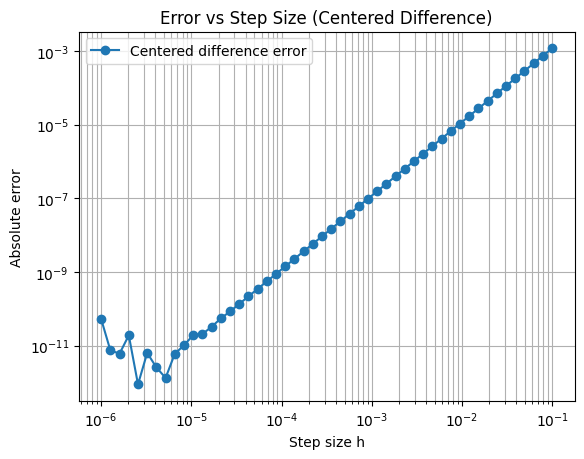

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its exact derivative
f = lambda x: np.sin(x)
df_exact = lambda x: np.cos(x)

x0 = np.pi / 4   # point of evaluation
hs = np.logspace(-6, -1, 50)  # step sizes
errors = []

for h in hs:
    df_approx = (f(x0 + h) - f(x0 - h)) / (2 * h)  # centered difference
    errors.append(abs(df_approx - df_exact(x0)))

plt.loglog(hs, errors, 'o-', label='Centered difference error')
plt.xlabel('Step size h')
plt.ylabel('Absolute error')
plt.title('Error vs Step Size (Centered Difference)')
plt.grid(True, which="both")
plt.legend()
plt.show()


### 💬 Discussion

- What do you observe about the slope of the line on the log–log plot?
- What happens when $h$ becomes very small (round-off error)?


## Exercise 1 – Forward Difference

Write a function `forward_diff(f, x0, h)` that returns the forward difference approximation  

$$
f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}
$$

Then:
1. Test it with $f(x) = e^x$ at $x_0 = 0$.
2. Compare with the exact derivative $f'(x) = e^x$.
3. Plot the **error vs. h** in a log–log plot.


## Exercise 2 – Backward Difference

Implement the backward difference formula in a function `backward_diff(f, x0, h)`  

$$
f'(x_0) \approx \frac{f(x_0) - f(x_0 - h)}{h}
$$

Use the same $f(x) = e^x$ and $x_0 = 0$.  
Compare and discuss the behavior of the error as $h$ changes.


In [4]:
def forward_diff(f, x0, h):
    return (f(x0 + h) - f(x0)) / h


## Exercise 3 – Compare All Three

1. On a single log–log plot, show the error for all three methods (forward, backward, centered).  
2. Use several $h$ values (for example, `np.logspace(-6, -1, 50)`).
3. Label the curves and include a legend.

**Discussion:**  
- Which method converges faster?  
- Why does the error increase again for very small $h$?


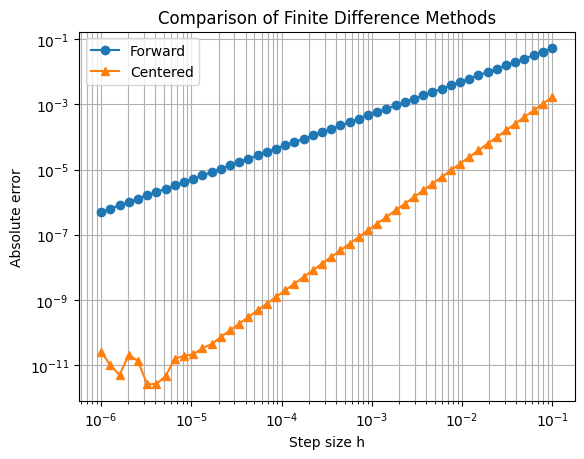

In [7]:
def centered_diff(f, x0, h):
    return (f(x0 + h) - f(x0 - h)) / (2*h)

# Test and compare
f = lambda x: np.exp(x)
df_exact = lambda x: np.exp(x)
x0 = 0.0
hs = np.logspace(-6, -1, 50)

err_fwd, err_bwd, err_cen = [], [], []

for h in hs:
    exact = df_exact(x0)
    err_fwd.append(abs(forward_diff(f, x0, h) - exact))
    #err_bwd.append(abs(backward_diff(f, x0, h) - exact))
    err_cen.append(abs(centered_diff(f, x0, h) - exact))

plt.loglog(hs, err_fwd, 'o-', label='Forward')
#plt.loglog(hs, err_bwd, 's-', label='Backward')
plt.loglog(hs, err_cen, '^-', label='Centered')
plt.xlabel('Step size h')
plt.ylabel('Absolute error')
plt.title('Comparison of Finite Difference Methods')
plt.grid(True, which='both')
plt.legend()
plt.show()


## Auto-Check Section

Run the next cell to test your three functions automatically.


In [9]:
import numpy as np

f = lambda x: np.exp(x)
df_exact = lambda x: np.exp(x)
x0 = 0.0
hs = [1e-1, 1e-3, 1e-5]

print("Checking your finite difference functions:\n")

for h in hs:
    fwd = forward_diff(f, x0, h)
    bwd = backward_diff(f, x0, h)
    cen = centered_diff(f, x0, h)
    exact = df_exact(x0)
    #print(f"h = {h:8.1e} | forward err = {abs(fwd-exact):.2e} | centered err = {abs(cen-exact):.2e}")
    print(f"h = {h:8.1e} | forward err = {abs(fwd-exact):.2e} | backward err = {abs(bwd-exact):.2e} | centered err = {abs(cen-exact):.2e}")


Checking your finite difference functions:

h =  1.0e-01 | forward err = 5.17e-02 | centered err = 1.67e-03
h =  1.0e-03 | forward err = 5.00e-04 | centered err = 1.67e-07
h =  1.0e-05 | forward err = 5.00e-06 | centered err = 1.21e-11


## How to See the Method’s Order from the Data

If a method is \(p\)-th order accurate, its error behaves like
$$
E(h) \approx C\, h^p.
$$
Taking logs:
$$
\log E \approx \log C + p \log h.
$$
So, on a log–log plot of error vs. \(h\), the **slope** is the **order \(p\)**.  
We can also estimate \(p\) directly from consecutive data:
$$
p \approx \frac{\log(E_i/E_{i-1})}{\log(h_i/h_{i-1})}.
$$


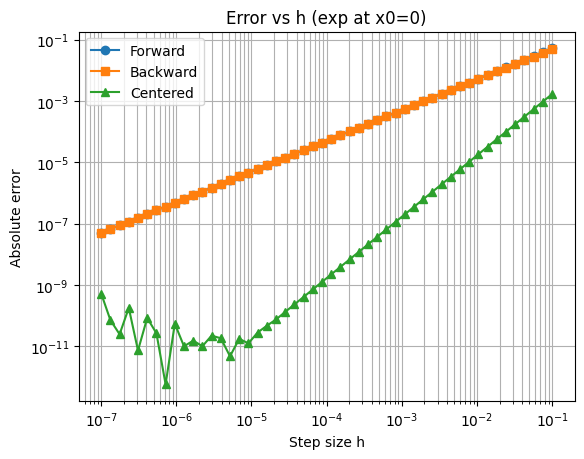

Estimated order (Forward):   1.00
Estimated order (Backward):  1.00
Estimated order (Centered):  1.08

Expected: Forward ≈ 1, Backward ≈ 1, Centered ≈ 2.


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# --- Finite difference functions ---
def forward_diff(f, x0, h):  return (f(x0 + h) - f(x0)) / h
def backward_diff(f, x0, h): return (f(x0) - f(x0 - h)) / h
def centered_diff(f, x0, h): return (f(x0 + h) - f(x0 - h)) / (2*h)

# --- Test function ---
f = lambda x: np.exp(x)
df = lambda x: np.exp(x)
x0 = 0.0

# --- Step sizes and errors ---
hs = np.logspace(-7, -1, 50)
err_fwd = np.array([abs(forward_diff(f, x0, h)  - df(x0)) for h in hs])
err_bwd = np.array([abs(backward_diff(f, x0, h) - df(x0)) for h in hs])
err_cen = np.array([abs(centered_diff(f, x0, h) - df(x0)) for h in hs])

# --- Plot (optional) ---
plt.loglog(hs, err_fwd, 'o-', label='Forward')
plt.loglog(hs, err_bwd, 's-', label='Backward')
plt.loglog(hs, err_cen, '^-', label='Centered')
plt.xlabel('Step size h')
plt.ylabel('Absolute error')
plt.title('Error vs h (exp at x0=0)')
plt.legend(); plt.grid(True, which="both")
plt.show()

# --- Simple order estimator ---
def estimate_order(errors, hs):
    """Compute average slope of log(error) vs log(h)."""
    errors = np.array(errors)
    hs = np.array(hs)
    p_local = np.log(errors[1:] / errors[:-1]) / np.log(hs[1:] / hs[:-1])
    return float(np.mean(p_local))

print("Estimated order (Forward):  ", f"{estimate_order(err_fwd, hs):.2f}")
print("Estimated order (Backward): ", f"{estimate_order(err_bwd, hs):.2f}")
print("Estimated order (Centered): ", f"{estimate_order(err_cen, hs):.2f}")
print("\nExpected: Forward ≈ 1, Backward ≈ 1, Centered ≈ 2.")


## Submission Instructions

After verifying that your code runs correctly:

1. Save your notebook: **File → Save a copy in GitHub**  
2. Use your private repository shared by your instructor.  
3. Commit message example:  Finite Differences Activity – Forward, Backward, Centered
4. Confirm your notebook appears in GitHub before leaving class.

